In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '4'

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import *
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from collections import defaultdict
from scipy.stats import pearsonr
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
df_with_genres = pd.read_csv("sample_genre_1000.csv", skipinitialspace=True)
df_with_genres.head()

,name,duration,popularity,artists,album_name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,n_beats,n_bars,genre
0,Projections,248,4,BCee;Logistics;Becca Jane Grey,Liquicity Festival 2022,0.5610,0.866,6,-2.858,0.0403,0.000853,0.840,0.0374,0.2470,174.067,710.0,177.0,idm
1,The Awakening - 2020 Edit,212,52,York;Scot & Millfield,The Awakening (2020 Edit),0.8480,0.870,11,-4.014,0.0395,0.172000,0.795,0.2470,0.2500,120.013,422.0,104.0,techno
2,Equality,54,0,Najand,In the Night of Revolution,0.1670,0.963,4,0.377,0.0711,0.107000,0.692,0.3970,0.0310,106.265,91.0,23.0,iranian
3,Midnight Sun,85,35,Nostalgique,Lofi Life,0.7330,0.355,0,-11.854,0.0369,0.287000,0.752,0.0895,0.2160,80.972,114.0,28.0,study
4,The Devil Master (Devil is Your Master),135,16,Devil Master,Manifestations,0.0916,0.998,11,-5.353,0.1700,0.002290,0.160,0.5220,0.0615,173.833,397.0,99.0,black-metal


In [3]:
df = pd.read_csv('sample_1000.csv', skipinitialspace=True) 
df.head()

,duration,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,n_beats,n_bars
0,248,4,0.5610,0.866,6,-2.858,0.0403,0.000853,0.840,0.0374,0.2470,174.067,710.0,177.0
1,212,52,0.8480,0.870,11,-4.014,0.0395,0.172000,0.795,0.2470,0.2500,120.013,422.0,104.0
2,54,0,0.1670,0.963,4,0.377,0.0711,0.107000,0.692,0.3970,0.0310,106.265,91.0,23.0
3,85,35,0.7330,0.355,0,-11.854,0.0369,0.287000,0.752,0.0895,0.2160,80.972,114.0,28.0
4,135,16,0.0916,0.998,11,-5.353,0.1700,0.002290,0.160,0.5220,0.0615,173.833,397.0,99.0


In [4]:
nostrings = df.select_dtypes(exclude=[object])
nostrings.head()

,duration,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,n_beats,n_bars
0,248,4,0.5610,0.866,6,-2.858,0.0403,0.000853,0.840,0.0374,0.2470,174.067,710.0,177.0
1,212,52,0.8480,0.870,11,-4.014,0.0395,0.172000,0.795,0.2470,0.2500,120.013,422.0,104.0
2,54,0,0.1670,0.963,4,0.377,0.0711,0.107000,0.692,0.3970,0.0310,106.265,91.0,23.0
3,85,35,0.7330,0.355,0,-11.854,0.0369,0.287000,0.752,0.0895,0.2160,80.972,114.0,28.0
4,135,16,0.0916,0.998,11,-5.353,0.1700,0.002290,0.160,0.5220,0.0615,173.833,397.0,99.0


In [5]:
nostrings.describe()

,duration,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,n_beats,n_bars
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,232.945000,28.466000,0.581590,0.682947,5.543000,-7.648366,0.058787,0.273191,0.259066,0.166610,0.488225,124.830469,479.610000,120.912000
std,77.554747,19.068625,0.167451,0.229149,3.597373,3.571233,0.031687,0.307317,0.364882,0.107187,0.269683,28.140356,194.803322,49.246517
min,35.000000,0.000000,0.091600,0.067700,0.000000,-18.341000,0.023900,0.000001,0.000000,0.011800,0.000010,54.956000,54.000000,17.000000
25%,181.000000,14.000000,0.481000,0.514500,2.000000,-9.681500,0.035675,0.006820,0.000000,0.093350,0.261250,103.029750,336.250000,84.750000
50%,224.000000,26.000000,0.598000,0.724500,6.000000,-7.074500,0.047550,0.132500,0.001490,0.122000,0.480500,125.830500,462.000000,116.000000
75%,283.250000,44.000000,0.705000,0.879000,9.000000,-4.993750,0.071325,0.501000,0.624000,0.217250,0.716500,141.953750,603.000000,152.250000
max,446.000000,83.000000,0.980000,1.000000,11.000000,0.377000,0.174000,0.994000,0.999000,0.540000,0.981000,200.661000,1006.000000,254.000000


In [6]:
# dropping everything but acousticness, energy and loudness
c = ['duration', 'popularity','danceability','energy','key','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','n_beats','n_bars','genre']

df_train = nostrings.drop(['duration', 'popularity','danceability','key','speechiness','instrumentalness','liveness','valence','tempo','n_beats','n_bars'], axis=1)

df_train.shape

(1000, 3)

In [7]:
df_train.head()

,energy,loudness,acousticness
0,0.866,-2.858,0.000853
1,0.870,-4.014,0.172000
2,0.963,0.377,0.107000
3,0.355,-11.854,0.287000
4,0.998,-5.353,0.002290


### First attempt with MinMax

In [8]:
# Variable transformation
scaler = MinMaxScaler()
training_data = scaler.fit_transform(df_train)

In [9]:
%%time
sse_list = []
for k in range(1, 51):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=1, max_iter=1000)
    kmeans.fit(training_data)
    sse_list.append(kmeans.inertia_)

CPU times: total: 312 ms
Wall time: 1.18 s


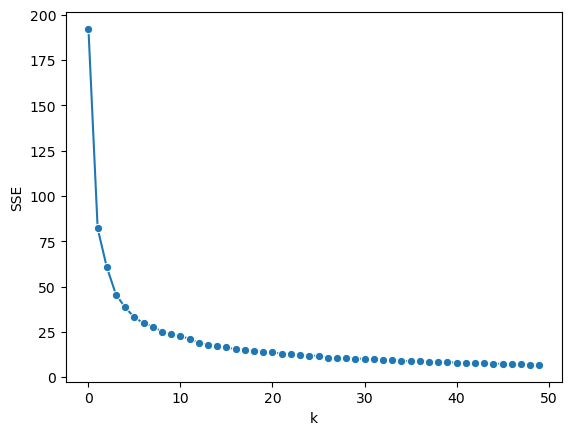

In [10]:
sns.lineplot(x=range(len(sse_list)), y=sse_list, marker='o')
plt.ylabel('SSE')
plt.xlabel('k')
plt.show()

In [11]:
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10, max_iter=100)
kmeans.fit(training_data)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print('labels', dict(zip(bins, hist)))
print('sse', kmeans.inertia_)
print('silhouette', silhouette_score(training_data, kmeans.labels_))

labels {0: 77, 1: 250, 2: 125, 3: 75, 4: 80, 5: 61, 6: 128, 7: 75, 8: 64, 9: 65}
sse 22.975988533232524
silhouette 0.32866797561818223


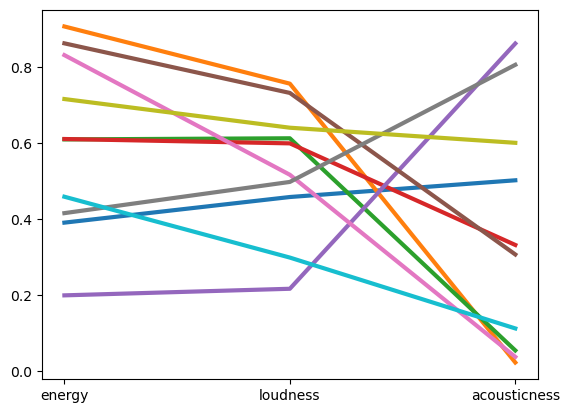

In [12]:
for i in range(len(kmeans.cluster_centers_)):
    plt.plot(range(0, 3), kmeans.cluster_centers_[i], label='Cluster %s' % i, linewidth=3)
plt.xticks(range(0, 3), list(df_train.columns))
plt.show()

In [13]:
df_clusters = df_train.copy()
df_clusters['Labels'] = kmeans.labels_

In [14]:
df_clusters.head()

,energy,loudness,acousticness,Labels
0,0.866,-2.858,0.000853,1
1,0.870,-4.014,0.172000,5
2,0.963,0.377,0.107000,1
3,0.355,-11.854,0.287000,9
4,0.998,-5.353,0.002290,1


In [15]:
energy_xt = pd.crosstab(df_clusters['energy'], df_clusters['Labels'])
energy_xt

Labels,0,1,2,3,4,5,6,7,8,9
energy,,,,,,,,,,
0.0677,0,0,0,0,1,0,0,0,0,0
0.0701,0,0,0,0,1,0,0,0,0,0
0.0859,0,0,0,0,1,0,0,0,0,0
0.0872,0,0,0,0,1,0,0,0,0,0
0.0875,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
0.9950,0,0,0,0,0,0,0,0,1,0
0.9960,0,1,0,0,0,0,1,0,0,0
0.9970,0,3,0,0,0,0,0,0,0,0


In [16]:
psurv_xt = pd.crosstab(df['energy'], df_clusters['Labels'])
psurv_xt = pd.crosstab(df_clusters['Labels'], df['energy'])

psurv_xt

energy,0.0677,0.0701,0.0859,0.0872,0.0875,0.1110,0.1140,0.1170,0.1210,0.1300,...,0.9900,0.9910,0.9920,0.9930,0.9940,0.9950,0.9960,0.9970,0.9980,1.0000
Labels,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,1,4,3,1,0,1,3,2,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,1,3,2,1,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
